# Introduction to Logistic Regression

### Working with the Breast Cancer Data

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
dataset = load_breast_cancer()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [146]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [7]:
X = dataset['data']
y = dataset['target']

In [8]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
import pandas as pd
df = pd.DataFrame(X, columns=dataset['feature_names'])
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


If we look at the feature names, we can see some of the features that were observed.  The dataset was created in 1992, so these features were recorded by hand for each of the 569 observations.  

In [149]:
X.shape

(569, 30)

In [11]:
df['is_cancerous'] = y

In [150]:
import pandas as pd
df = pd.DataFrame(X, columns = dataset['feature_names'])
df['is_cancerous'] = y

## Visualizing our problem

### 1. Plotting one dimension

Plot is `mean area` vs `is_cancerous`.

In [13]:
from graph import trace_values, plot


layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'is cancerous'}}


### Add mean concavity improve separability

This time,

* display a separate feature on each axis.  
* indicate whether a cell is cancerous or not by giving our datapoints different colors. 

1. Split data based on feature

In [24]:
scoped_df = df[['mean area', 'mean concavity']]

scoped_cancerous_df = scoped_df[df.is_cancerous == 1]
scoped_non_cancerous_df = scoped_df[df.is_cancerous != 1]

2. Separate out x_1, and x_2 features, and plot

In [21]:
mean_area_c = scoped_cancerous_df.iloc[:, 0]
mean_concavity_c = scoped_cancerous_df.iloc[:, 1]

mean_area_nc = scoped_non_cancerous_df.iloc[:, 0]
mean_concavity_nc = scoped_non_cancerous_df.iloc[:, 1]

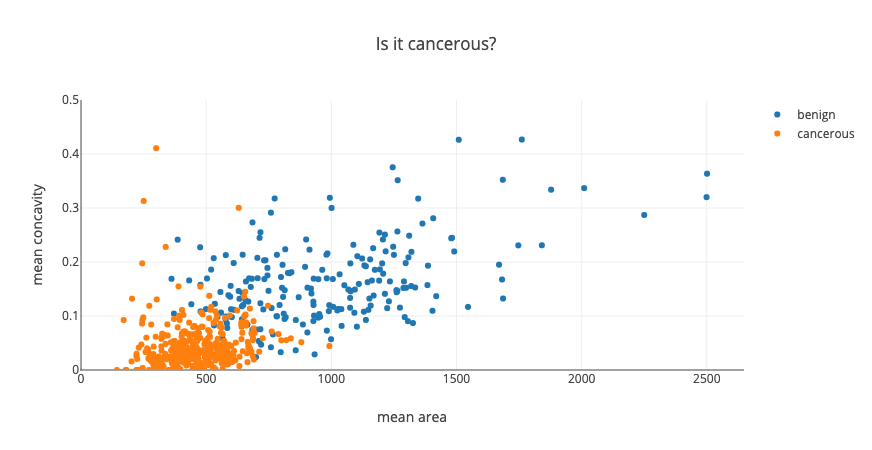

In [22]:
cancerous_trace = trace_values(x_values=mean_area_c, y_values=mean_concavity_c, name = 'cancerous')
non_cancerous_trace = trace_values(x_values=mean_area_nc, y_values=mean_concavity_nc, name = 'benign')
layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}

plot([non_cancerous_trace, cancerous_trace], layout = layout)

So as you can see we differentiate the observed labels with an orange dot for cancerous and a blue dot for benign.

### Answering the Question

When to is a cell likely to be cancerous?

* Again, use a line
* But in a different way than least squares

Our hypothesis function is a **decision boundary**, or decision function.  

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scoped_df = df[['mean area', 'mean concavity']]

y = dataset['target']
model = LogisticRegression()
model.fit(scoped_df, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now after fitting our logistic regression model, we are given a set of parameters just like previously.  But this time our parameters are used to create our decision boundary.

In [154]:
model.coef_

array([[-0.00802333, -3.47361781]])

In [155]:
model.intercept_

array([5.86599622])

## Plot the decision boundary

In [156]:
def decision_boundary_y(x, coefs, intercept):
    coef_pair = coefs[0]
    return (coef_pair[0]/coef_pair[1])*x + intercept[0]/coef_pair[1]

In [157]:
area_values = list(range(500, 1000, 5))
boundaries = [decision_boundary_y(idx, model.coef_, model.intercept_) for idx in area_values]

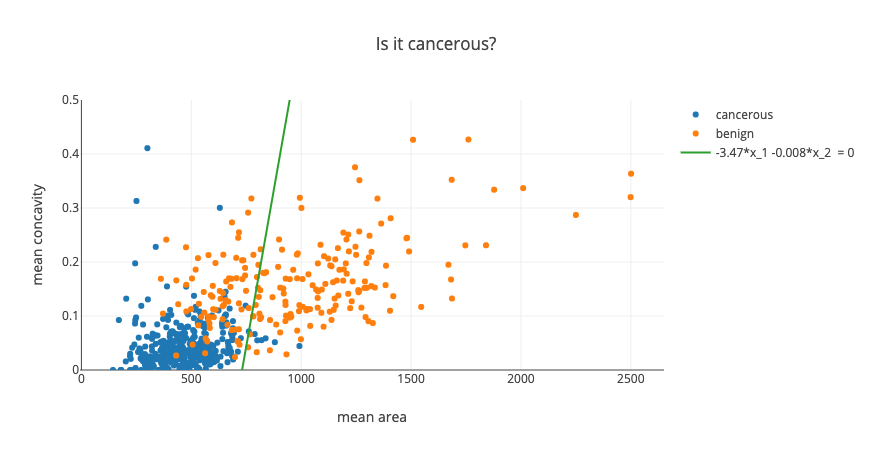

In [158]:
decision_trace = trace_values(x_values=area_values, y_values=boundaries, mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')

layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
plot([cancerous_trace, non_cancerous_trace, decision_trace], layout = layout)

Let's take a look at the diagram above.  The green line is the fitted decision boundary.  We'll discuss how that model came to the decision boundary in a following lesson.  But for now, let's just take it as given that this boundary makes sense.

Now this boundary indicates the predictions of our model.  Everything to the right of the line is predicted as benign, and everything to the left of the line is predicted as cancerous.

Now that we understand how the model works, we can see that there are a half dozen orange cancerous points on the benign side of the line.  And there are many more benign observed cells on the cancerous side of our decision boundary.  We'll discuss why this is the case, and whether this is good or not in following lessons, but for now it is important simply to make sure we are interpreting the graph correctly.

### Our predictions mathematically

So we how we can use our decision boundary to visually see if our model predicts a value as being cancerous or non-cancerous.  We can also use our trained parameters to predict whether a datapoint is positive or negative -- or in this case, to predict whether a cell is cancerous or not.

Let's take another look at our model parameters.

In [159]:
model.coef_

array([[-0.00802333, -3.47361781]])

In [160]:
model.intercept_

array([5.86599622])

We can use these parameters to define the following function.  And if our function outputs a positive number, we'll predict our datapoint as being one, or cancerous.  If our function outputs a negative number, then we'll interpret our datapoint as 0, or benign.

In [161]:
def decision_boundary_function(mean_area, mean_concavity):
    return -0.00802333*mean_area - 3.47361781 * mean_concavity + 5.86599622

Let's put this function to the test.

In [162]:
scoped_df = df[['mean area', 'mean concavity']]
scoped_df.columns = ['mean_area', 'mean_concavity']
scoped_df['y'] = dataset['target']
scoped_df.iloc[17:22, :]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,mean_area,mean_concavity,y
17,798.8,0.17220,0
18,1260.0,0.14790,0
19,566.3,0.06664,1
20,520.0,0.04568,1
21,273.9,0.02956,1


In [163]:
scoped_df.iloc[17:22, 0:-1].apply(lambda x: decision_boundary_function(*x), axis=1)

17   -1.141197
18   -4.757148
19    1.090903
20    1.535190
21    3.565726
dtype: float64

So we can see that with using the prediction formula, it appears to be working at taking our two features and using these features to predict whether a cell is cancerous or not.

In [164]:
def decision_boundary_function(mean_area, mean_concavity):
    return -0.00802333*mean_area - 3.47361781 * mean_concavity + 5.86599622

We could write some simple if else logic to turn these positive and negative numbers into ones or zeros.  Or we can also use sklearn to pass our features into the decision_boundary function for us.

In [165]:
model.decision_function(scoped_df[['mean_area', 'mean_concavity']])[17:22]

array([-1.14119896, -4.75715111,  1.090901  ,  1.53518833,  3.56572524])

And to turn these into predictions.

In [166]:
model.predict(scoped_df[['mean_area', 'mean_concavity']])[17:22]

array([0, 0, 1, 1, 1])

### Resources

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)